In [2]:
from datetime import datetime, timedelta
from collections import defaultdict

# Upload the file
from google.colab import files
uploaded = files.upload()

# Replace 'Browsing History.txt' with the exact name of your uploaded file
file_path = 'Browsing History.txt'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the dates and times from the file
timestamps = []
for line in lines:
    if line.startswith('Date:'):
        timestamp = line.split('Date: ')[1].strip()
        timestamps.append(datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S'))

# Group timestamps by date
daily_screen_time = defaultdict(list)
for ts in timestamps:
    date = ts.date()
    daily_screen_time[date].append(ts)

# Calculate total screen time per day with a gap threshold
gap_threshold = timedelta(minutes=5)  # Define a gap threshold of 5 minutes
daily_screen_duration = {}

for date, times in daily_screen_time.items():
    times = sorted(times)
    total_duration = timedelta(0)
    for i in range(1, len(times)):
        gap = times[i] - times[i - 1]
        if gap <= gap_threshold:
            total_duration += gap
    daily_screen_duration[date] = total_duration

# Print daily screen time
print("Daily TikTok Screen Time (excluding large gaps):")
for date, duration in daily_screen_duration.items():
    hours, remainder = divmod(duration.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    print(f"{int(hours)}h {int(minutes)}m {int(seconds)}s")



Saving Browsing History.txt to Browsing History.txt
Daily TikTok Screen Time (excluding large gaps):
1h 31m 21s
0h 13m 59s
0h 27m 48s
0h 36m 31s
0h 28m 31s
1h 1m 38s
0h 37m 4s
0h 11m 39s
0h 28m 3s
0h 5m 7s
0h 46m 34s
1h 50m 55s
1h 29m 9s
0h 28m 40s
0h 39m 46s
1h 52m 25s
1h 49m 50s
0h 27m 32s
0h 30m 53s
0h 14m 44s
0h 23m 38s
0h 31m 34s
0h 5m 30s
0h 0m 31s
0h 14m 22s
0h 11m 57s
0h 41m 42s
0h 28m 1s
2h 24m 56s
2h 20m 33s
1h 33m 58s
0h 17m 8s
0h 18m 32s
0h 20m 26s
1h 12m 7s
1h 19m 41s
0h 28m 45s
0h 37m 51s
0h 19m 30s
0h 41m 51s
0h 33m 53s
0h 9m 45s
0h 42m 39s
0h 45m 33s
0h 32m 36s
0h 56m 6s
0h 58m 46s
1h 38m 12s
2h 24m 52s
0h 24m 11s
0h 21m 58s
0h 18m 51s
1h 31m 53s
1h 45m 52s
1h 42m 37s
2h 15m 12s
1h 59m 30s
0h 49m 21s
1h 6m 55s
1h 6m 55s
0h 31m 27s
0h 45m 29s
2h 16m 7s
1h 35m 42s
0h 54m 30s
0h 50m 31s
0h 12m 47s
0h 20m 25s
1h 33m 18s
1h 29m 31s
0h 46m 18s
1h 15m 13s
1h 40m 51s
0h 58m 29s
0h 48m 18s
0h 1m 24s
0h 37m 16s
0h 42m 6s
0h 9m 29s
0h 43m 3s
0h 22m 48s
0h 31m 55s
0h 5m 18s
1h 0m 1

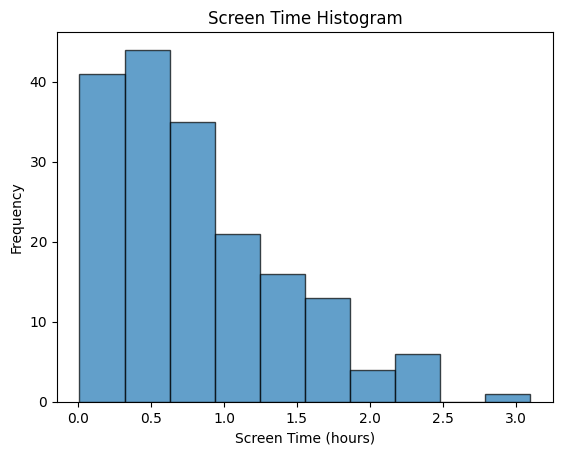

In [3]:
import matplotlib.pyplot as plt

# Data in 'hours:minutes:seconds' format
#data starting from Date: 2024-06-22
screen_time_data = ["1h 31m 21s", "0h 13m 59s", "0h 27m 48s", "0h 36m 31s", "0h 28m 31s", "1h 1m 38s", "0h 37m 4s", "0h 11m 39s", "0h 28m 3s",
                    "0h 5m 7s", "0h 46m 34s", "1h 50m 55s", "1h 29m 9s", "0h 28m 40s", "0h 39m 46s",
                    "1h 52m 25s", "1h 49m 50s", "0h 27m 32s", "0h 30m 53s", "0h 14m 44s", "0h 23m 38s",
                    "0h 31m 34s", "0h 5m 30s", "0h 0m 31s", "0h 14m 22s", "0h 11m 57s", "0h 41m 42s", "0h 28m 1s",
                    "2h 24m 56s", "2h 20m 33s", "1h 33m 58s", "0h 17m 8s", "0h 18m 32s", "0h 20m 26s", "1h 12m 7s",
                    "1h 19m 41s", "0h 28m 45s", "0h 37m 51s", "0h 19m 30s", "0h 41m 51s", "0h 33m 53s", "0h 9m 45s",
                    "0h 42m 39s", "0h 45m 33s", "0h 32m 36s", "0h 56m 6s", "0h 58m 46s", "1h 38m 12s", "2h 24m 52s",
                    "0h 24m 11s", "0h 21m 58s", "0h 18m 51s", "1h 31m 53s", "1h 45m 52s", "1h 42m 37s", "2h 15m 12s",
                    "1h 59m 30s", "0h 49m 21s", "1h 6m 55s", "1h 6m 55s", "0h 31m 27s", "0h 45m 29s", "2h 16m 7s", "1h 35m 42s",
                    "0h 54m 30s", "0h 50m 31s", "0h 12m 47s", "0h 20m 25s", "1h 33m 18s", "1h 29m 31s", "0h 46m 18s", "1h 15m 13s",
                    "1h 40m 51s", "0h 58m 29s", "0h 48m 18s", "0h 1m 24s", "0h 37m 16s", "0h 42m 6s", "0h 9m 29s", "0h 43m 3s",
                    "0h 22m 48s", "0h 31m 55s", "0h 5m 18s", "1h 0m 17s", "1h 2m 58s", "0h 24m 40s", "0h 25m 37s", "0h 43m 35s",
                    "0h 5m 58s", "0h 1m 59s", "0h 32m 18s", "0h 9m 27s", "0h 37m 38s", "0h 24m 20s", "0h 22m 26s", "1h 18m 51s",
                    "1h 27m 1s", "0h 4m 6s", "0h 28m 21s", "1h 53m 23s", "0h 41m 37s", "0h 32m 18s", "0h 39m 56s", "0h 30m 25s",
                    "1h 5m 58s", "1h 20m 27s", "1h 12m 5s", "0h 30m 16s", "1h 46m 39s", "0h 31m 19s", "0h 32m 53s", "0h 8m 53s",
                    "1h 9m 38s", "0h 41m 25s", "0h 58m 24s", "0h 48m 35s", "1h 17m 26s", "1h 7m 6s", "0h 17m 54s", "0h 13m 21s",
                    "0h 48m 57s", "0h 28m 36s", "0h 1m 22s", "0h 5m 39s", "0h 33m 13s", "0h 15m 6s", "0h 10m 40s", "1h 15m 8s",
                    "0h 16m 20s", "0h 33m 32s", "1h 47m 49s", "0h 1m 0s", "0h 28m 19s", "0h 17m 20s", "0h 2m 43s", "0h 23m 41s",
                    "0h 2m 15s", "0h 45m 44s", "0h 45m 55s", "1h 36m 19s", "0h 59m 42s", "0h 55m 8s", "0h 20m 36s", "0h 51m 27s",
                    "1h 0m 11s", "0h 3m 31s", "0h 9m 45s", "0h 35m 15s", "0h 17m 57s", "0h 10m 56s", "0h 59m 55s", "1h 58m 53s", "1h 32m 32s",
                    "1h 10m 5s", "0h 45m 29s", "2h 15m 3s", "1h 50m 19s", "3h 6m 6s", "0h 46m 5s", "0h 54m 1s", "0h 14m 8s", "1h 6m 7s",
                    "1h 22m 0s", "1h 42m 12s", "0h 16m 11s", "0h 11m 56s", "0h 37m 52s", "1h 10m 12s", "0h 20m 50s", "1h 21m 55s",
                    "1h 15m 1s", "0h 25m 29s", "0h 54m 10s", "1h 0m 34s", "0h 49m 6s", "1h 12m 51s", "0h 51m 32s", "0h 41m 32s",
                    "0h 15m 21s", "0h 34m 23s", "0h 16m 1s"]

    # Add all the remaining data in this list

# Function to convert time format to decimal hours
def time_to_decimal_hours(time_str):
    hours, minutes, seconds = 0, 0, 0
    if "h" in time_str:
        hours = int(time_str.split("h")[0])
        time_str = time_str.split("h")[1]
    if "m" in time_str:
        minutes = int(time_str.split("m")[0])
        time_str = time_str.split("m")[1]
    if "s" in time_str:
        seconds = int(time_str.split("s")[0])
    return hours + minutes / 60 + seconds / 3600

# Convert all times to decimal hours
decimal_hours = [time_to_decimal_hours(t) for t in screen_time_data]

# Create the histogram
plt.hist(decimal_hours, bins=10, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title("Screen Time Histogram")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [13]:
time_data = ["1h 31m 21s", "0h 13m 59s", "0h 27m 48s", "0h 36m 31s", "0h 28m 31s", "1h 1m 38s", "0h 37m 4s", "0h 11m 39s", "0h 28m 3s",
                    "0h 5m 7s", "0h 46m 34s", "1h 50m 55s", "1h 29m 9s", "0h 28m 40s", "0h 39m 46s",
                    "1h 52m 25s", "1h 49m 50s", "0h 27m 32s", "0h 30m 53s", "0h 14m 44s", "0h 23m 38s",
                    "0h 31m 34s", "0h 5m 30s", "0h 0m 31s", "0h 14m 22s", "0h 11m 57s", "0h 41m 42s", "0h 28m 1s",
                    "2h 24m 56s", "2h 20m 33s", "1h 33m 58s", "0h 17m 8s", "0h 18m 32s", "0h 20m 26s", "1h 12m 7s",
                    "1h 19m 41s", "0h 28m 45s", "0h 37m 51s", "0h 19m 30s", "0h 41m 51s", "0h 33m 53s", "0h 9m 45s",
                    "0h 42m 39s", "0h 45m 33s", "0h 32m 36s", "0h 56m 6s", "0h 58m 46s", "1h 38m 12s", "2h 24m 52s",
                    "0h 24m 11s", "0h 21m 58s", "0h 18m 51s", "1h 31m 53s", "1h 45m 52s", "1h 42m 37s", "2h 15m 12s",
                    "1h 59m 30s", "0h 49m 21s", "1h 6m 55s", "1h 6m 55s", "0h 31m 27s", "0h 45m 29s", "2h 16m 7s", "1h 35m 42s",
                    "0h 54m 30s", "0h 50m 31s", "0h 12m 47s", "0h 20m 25s", "1h 33m 18s", "1h 29m 31s", "0h 46m 18s", "1h 15m 13s",
                    "1h 40m 51s", "0h 58m 29s", "0h 48m 18s", "0h 1m 24s", "0h 37m 16s", "0h 42m 6s", "0h 9m 29s", "0h 43m 3s",
                    "0h 22m 48s", "0h 31m 55s", "0h 5m 18s", "1h 0m 17s", "1h 2m 58s", "0h 24m 40s", "0h 25m 37s", "0h 43m 35s",
                    "0h 5m 58s", "0h 1m 59s", "0h 32m 18s", "0h 9m 27s", "0h 37m 38s", "0h 24m 20s", "0h 22m 26s", "1h 18m 51s",
                    "1h 27m 1s", "0h 4m 6s", "0h 28m 21s", "1h 53m 23s", "0h 41m 37s", "0h 32m 18s", "0h 39m 56s", "0h 30m 25s",
                    "1h 5m 58s", "1h 20m 27s", "1h 12m 5s", "0h 30m 16s", "1h 46m 39s", "0h 31m 19s", "0h 32m 53s", "0h 8m 53s",
                    "1h 9m 38s", "0h 41m 25s", "0h 58m 24s", "0h 48m 35s", "1h 17m 26s", "1h 7m 6s", "0h 17m 54s", "0h 13m 21s",
                    "0h 48m 57s", "0h 28m 36s", "0h 1m 22s", "0h 5m 39s", "0h 33m 13s", "0h 15m 6s", "0h 10m 40s", "1h 15m 8s",
                    "0h 16m 20s", "0h 33m 32s", "1h 47m 49s", "0h 1m 0s", "0h 28m 19s", "0h 17m 20s", "0h 2m 43s", "0h 23m 41s",
                    "0h 2m 15s", "0h 45m 44s", "0h 45m 55s", "1h 36m 19s", "0h 59m 42s", "0h 55m 8s", "0h 20m 36s", "0h 51m 27s",
                    "1h 0m 11s", "0h 3m 31s", "0h 9m 45s", "0h 35m 15s", "0h 17m 57s", "0h 10m 56s", "0h 59m 55s", "1h 58m 53s", "1h 32m 32s",
                    "1h 10m 5s", "0h 45m 29s", "2h 15m 3s", "1h 50m 19s", "3h 6m 6s", "0h 46m 5s", "0h 54m 1s", "0h 14m 8s", "1h 6m 7s",
                    "1h 22m 0s", "1h 42m 12s", "0h 16m 11s", "0h 11m 56s", "0h 37m 52s", "1h 10m 12s", "0h 20m 50s", "1h 21m 55s",
                    "1h 15m 1s", "0h 25m 29s", "0h 54m 10s", "1h 0m 34s", "0h 49m 6s", "1h 12m 51s", "0h 51m 32s", "0h 41m 32s",
                    "0h 15m 21s", "0h 34m 23s", "0h 16m 1s"]



# Function to convert h m s to total minutes
def convert_to_minutes(time_str):
    parts = time_str.split(" ")
    hours = int(parts[0].replace("h", ""))
    minutes = int(parts[1].replace("m", ""))
    seconds = int(parts[2].replace("s", ""))
    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes

# Convert and print each time in minutes on separate rows
for time in time_data:
    print(f"{convert_to_minutes(time):.2f}")


91.35
13.98
27.80
36.52
28.52
61.63
37.07
11.65
28.05
5.12
46.57
110.92
89.15
28.67
39.77
112.42
109.83
27.53
30.88
14.73
23.63
31.57
5.50
0.52
14.37
11.95
41.70
28.02
144.93
140.55
93.97
17.13
18.53
20.43
72.12
79.68
28.75
37.85
19.50
41.85
33.88
9.75
42.65
45.55
32.60
56.10
58.77
98.20
144.87
24.18
21.97
18.85
91.88
105.87
102.62
135.20
119.50
49.35
66.92
66.92
31.45
45.48
136.12
95.70
54.50
50.52
12.78
20.42
93.30
89.52
46.30
75.22
100.85
58.48
48.30
1.40
37.27
42.10
9.48
43.05
22.80
31.92
5.30
60.28
62.97
24.67
25.62
43.58
5.97
1.98
32.30
9.45
37.63
24.33
22.43
78.85
87.02
4.10
28.35
113.38
41.62
32.30
39.93
30.42
65.97
80.45
72.08
30.27
106.65
31.32
32.88
8.88
69.63
41.42
58.40
48.58
77.43
67.10
17.90
13.35
48.95
28.60
1.37
5.65
33.22
15.10
10.67
75.13
16.33
33.53
107.82
1.00
28.32
17.33
2.72
23.68
2.25
45.73
45.92
96.32
59.70
55.13
20.60
51.45
60.18
3.52
9.75
35.25
17.95
10.93
59.92
118.88
92.53
70.08
45.48
135.05
110.32
186.10
46.08
54.02
14.13
66.12
82.00
102.20
16.18
11.93
37.

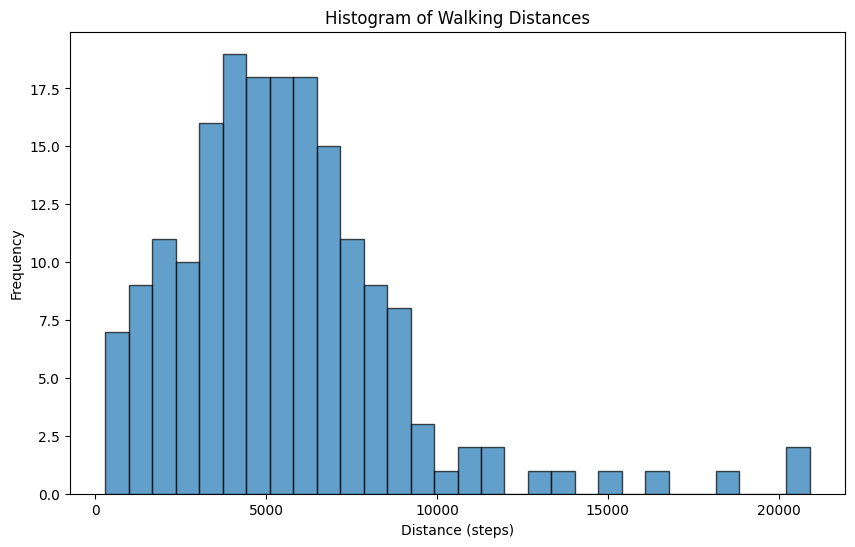

In [11]:
walking_distances=[1436, 6841, 3005, 8536, 3855, 8409, 2261, 2058, 2737, 7714, 5419, 594, 3600, 6285, 2823, 4365, 8349, 4775, 6857, 16298,
                   7682, 2856, 11049, 18200, 20329, 20916, 9144, 3847, 1229, 3562, 6767, 4120, 1425, 8682, 3788, 1100, 444, 6261, 4318,
                   5813, 7925, 2836, 5759, 5931, 3984, 3572, 6760, 3075, 4646, 1668, 2464, 3230, 8224, 5001, 293, 8558, 4276, 2038, 7016,
                   6756, 6668, 5393, 6036, 7258, 951, 4284, 4645,5784, 5874, 8395, 5513, 6119, 14795, 7696, 3533, 7487, 3295, 1771, 11930,
                   9171, 6543, 4731, 4772, 5562, 2309, 9893, 5879, 3784, 5674, 3996, 11131, 6887, 4766, 4348, 2934, 5645, 7411, 8458, 3609,
                   3343, 7085, 7844, 2690, 3436, 4326, 5921, 755, 3701, 2075, 1982, 5681, 1771, 9365, 6594, 5641, 8037, 4316, 8945, 4790,
                   4770, 6744, 6166, 8742, 6254, 6017, 5475, 13147, 13696, 5451, 7666, 7839, 5870, 4308, 3581, 3442, 8063, 5265, 11620, 7362,
                   5954, 4608, 6103, 4444, 3264, 5043, 5460, 5591, 3316, 5977, 8802, 1091, 9740, 2468, 5624, 7025, 4659, 3764, 7815, 6190, 3953,
                   3408, 7006, 5926, 4459, 4608, 4589, 8676, 4859, 5454, 5779, 4826, 2738, 1612, 553, 1463, 3977, 1283, 1651, 1872, 6949, 1783, 9976, 4290, 640]

import matplotlib.pyplot as plt

# Assuming walking_distances contains the data
# Example: walking_distances = [1436, 6841, 3005, ...]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(walking_distances, bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title("Histogram of Walking Distances")
plt.xlabel("Distance (steps)")
plt.ylabel("Frequency")

# Show the plot
plt.show()



